# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimpy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from hmmlearn import hmm
import pickle

# Data prepration

In [2]:
data = pd.read_csv("data/Original_Dataset.csv")

In [3]:
# exploring the dataset
data.head()

LC_X_1  LC_X_2  LC_X_3  LC_X_4  LC_X_5  LC_X_6  LC_X_7  LC_X_8  LC_X_9  \
0     307     389     259     259     259     259     259     258     258   
1     340     340     340     340     339     339     340     339     338   
2     260     263     266     266     270     271     271     271     271   
3     338     339     338     337     337     337     337     337     336   
4     319     240     240     318     241     318     318     318     318   

   LC_X_10  ...  RD_22  RD_23  RD_24  RD_25  RD_26  RD_27  RD_28  RD_29  \
0      259  ...   1001   1001   1004   1007   1013   1013   1016   1016   
1      338  ...   1007   1007   1007   1010   1010   1010   1010   1013   
2      271  ...    962    959      0    957    957    959    959    962   
3      335  ...   1013   1010   1010   1010   1013   1010   1010   1013   
4      318  ...   1016   1016   1022   1022   1013   1016   1016   1019   

   RD_30  Gesture  
0   1019   ZoomIn  
1   1010   ZoomIn  
2    962   ZoomIn  
3   1010   ZoomIn  
4   1019   ZoomIn  

[5 rows x 781 columns]

In [4]:
# filtering the data so that dataset should be in shape 450,30,4
cols_lx = [] # Left hand x coordinate columns
cols_ly = [] # Left hand y coordinate columns
cols_rx = [] # Right hand x coordinate columns
cols_ry = [] # Right hand y coordinnate columns
gesture_y = ["Gesture"]
for x in range(1,31):
    cols_lx.append(f"LC_X_{x}")
    cols_ly.append(f"LC_Y_{x}")
    cols_rx.append(f"RC_X_{x}")
    cols_ry.append(f"RC_Y_{x}")

In [5]:
total_data = cols_lx + cols_ly + cols_rx + cols_ry + gesture_y

In [6]:
data = data[total_data]

In [7]:
# skimming the dataframe
# summary of all data.
skimpy.skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 350    │ │ int64       │ 120   │                                                          │
│ │ Number of columns │ 121    │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA    ┃ NA %     ┃ mean     ┃ sd     ┃ p0    ┃ p25    ┃ p75    ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ LC_X_1              │     0 │        0 │      260 │     80 │     0 │    210 │    320 │     470 │   ▁▆█▄▁   │  │
│ │ LC_X_2              │     0 │        0 │      260 │     82 │     0 │    210 │    320 │     480 │   ▂▆█▄▁   │  │
│ │ LC_X_3              │     0 │        0 │      260 │     81 │     0 │    210 │    320 │     470 │   ▁▆█▄▁   │  │
│ │ LC_X_4              │     0 │        0 │      260 │     80 │     0 │    210 │    320 │     480 │   ▁▆█▄▁   │  │
│ │ LC_X_5              │     0 │        0 │      270 │     79 │     0 │    210 │    320 │     470 │   ▁▆█▄▁   │  │
│ │ LC_X_6              │     0 │        0 │      270 │     77 │     0 │    210 │    320 │     480 │   ▁▆█▄▁   │  │
│ │ LC_X_7              │     0 │        0 │      270 │     75 │     0 │    210 │    320 │     480 │   ▁▆█▄▁   │  │
│ │ LC_X_8              │     0 │        0 │      270 │     77 │     0 │    210 │    320 │     470 │   ▁▆█▄▁   │  │
│ │ LC_X_9              │     0 │        0 │      260 │     79 │     0 │    210 │    320 │     470 │   ▁▆█▄▁   │  │
│ │ LC_X_10             │     0 │        0 │      260 │     79 │     0 │    210 │    320 │     470 │   ▁▆█▄▁   │  │
│ │ LC_X_11             │     0 │        0 │      260 │     81 │     0 │    210 │    320 │     470 │   ▁▆█▄▁   │  │
│ │ LC_X_12             │     0 │        0 │      260 │     79 │     0 │    210 │    320 │     470 │   ▁▆█▄▁   │  │
│ │ LC_X_13             │     0 │        0 │      260 │     77 │     0 │    220 │    310 │     470 │   ▁▅█▄▁   │  │
│ │ LC_X_14             │     0 │        0 │      260 │     80 │     0 │    220 │    310 │     470 │  ▁▁▆█▄▁   │  │
│ │ LC_X_15             │     0 │        0 │      260 │     73 │     0 │    220 │    310 │     460 │   ▁▅█▄▁   │  │
│ │ LC_X_16             │     0 │        0 │      270 │     70 │     0 │    220 │    310 │     460 │    ▅█▅▁   │  │
│ │ LC_X_17             │     0 │        0 │      260 │     71 │     0 │    220 │    310 │     460 │    ▅█▄▁   │  │
│ │ LC_X_18             │     0 │        0 │      260 │     69 │     0 │    220 │    310 │     460 │    ▅█▅▁   │  │
│ │ LC_X_19             │     0 │        0 │      270 │     65 │     0 │    220 │    310 │     450 │    ▅█▅▁   │  │
│ │ LC_X_20             │     0 │        0 │      270 │     64 │     0 │    220 │    310 │     450 │    ▄█▅▁   │  │
│ │ LC_X_21             │     0 │        0 │      270 │     66 │     0 │    220 │    310 │     440 │    ▄█▅▁   │  │
│ │ LC_X_22             │     0 │        0 │      270 │     64 │     0 │    220 │    310 │     440 │    ▄█▅▁   │  │
│ │ LC_X_23             │     0 │        0 │      270 │ 

In [8]:
X = data.drop("Gesture" , axis = 1)
y = data.Gesture.to_numpy()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

In [10]:
# splitting the dataset so that 10% of each class will be there in the test data
print("Verifying that each class is getting 40 samples for training and 10 samples for testing ")
pd.DataFrame(y_train).value_counts()#pd.DataFrame(y_test).value_counts()


Verifying that each class is getting 40 samples for training and 10 samples for testing 


MoveDown     40
MoveLeft     40
MoveRight    40
MoveUp       40
Press        40
ZoomIn       40
ZoomOut      40
dtype: int64

In [11]:
data.Gesture.value_counts()

ZoomIn       50
ZoomOut      50
MoveLeft     50
MoveRight    50
MoveDown     50
MoveUp       50
Press        50
Name: Gesture, dtype: Int64

# Model building and dataset transformation

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
def plot_transition_matrix(model,model_name):
    plt.figure(figsize = (10,8))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
    ax1.imshow(model.transmat_, aspect='auto', cmap='spring')
    ax1.set_title(f'Generated Transition Matrix {model_name}')
    ax2.imshow(model.transmat_, aspect='auto', cmap='spring')
    ax2.set_title(f'Recovered Transition Matrix {model_name}')
    for ax in (ax1, ax2):
        ax.set_xlabel('State To')
        ax.set_ylabel('State From')
    fig.tight_layout()
    fig.show()

/var/folders/9h/rkdys_7j48bdzt7thspm98sw0000gn/T/ipykernel_28310/3819072027.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/9h/rkdys_7j48bdzt7thspm98sw0000gn/T/ipykernel_28310/3819072027.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/pankajgope/opt/anaconda3/lib/python3.8/site-packages/hmmlearn/hmm.py:986: RuntimeWarning: invalid value encountered in true_divide
  self.weights_ = w_n / w_d
/Users/pankajgope/opt/anaconda3/lib/python3.8/site-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
/var/folders/9h/rkdys_7j48bdzt7thspm98sw0000gn/T/ipykernel_28310/3819072027.py:12: UserWarn

<Figure size 720x576 with 0 Axes>

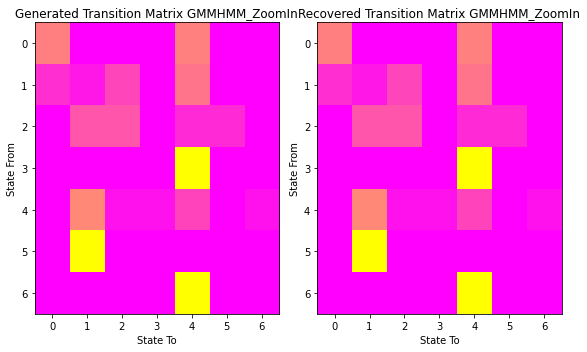

<Figure size 720x576 with 0 Axes>

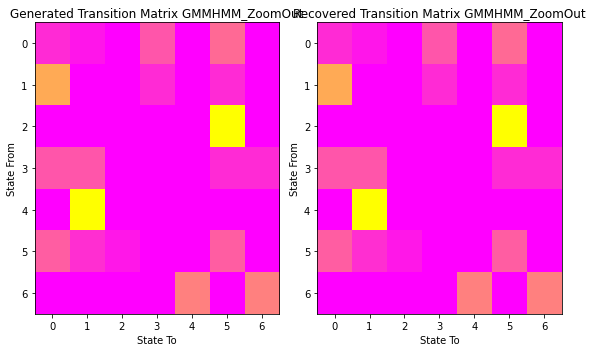

<Figure size 720x576 with 0 Axes>

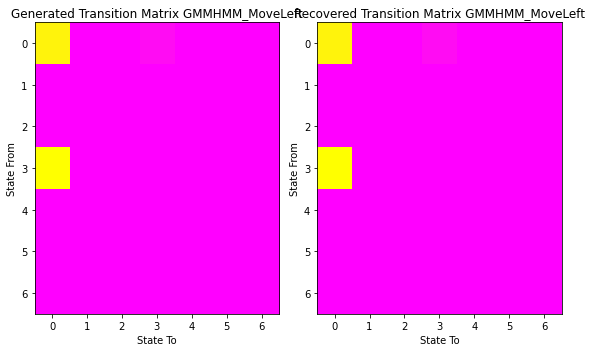

<Figure size 720x576 with 0 Axes>

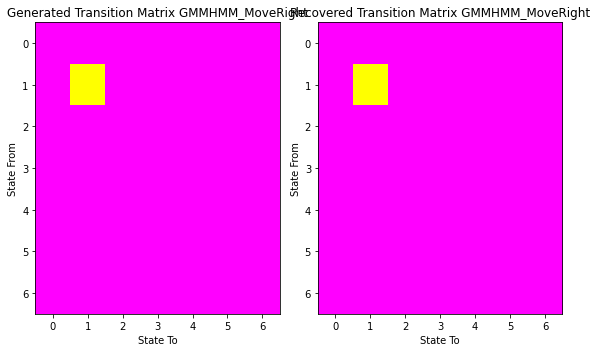

<Figure size 720x576 with 0 Axes>

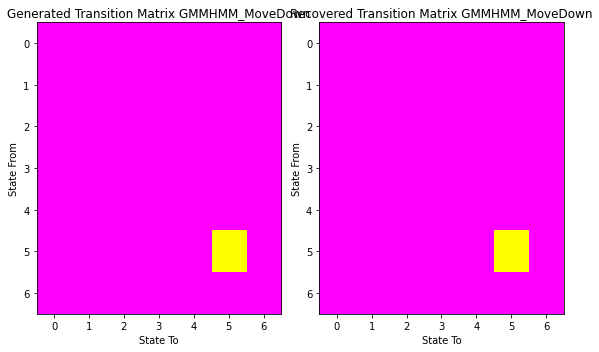

<Figure size 720x576 with 0 Axes>

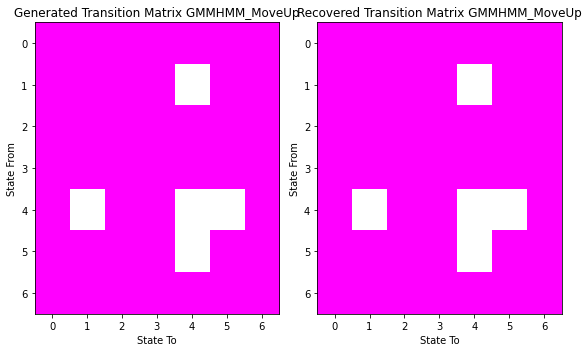

<Figure size 720x576 with 0 Axes>

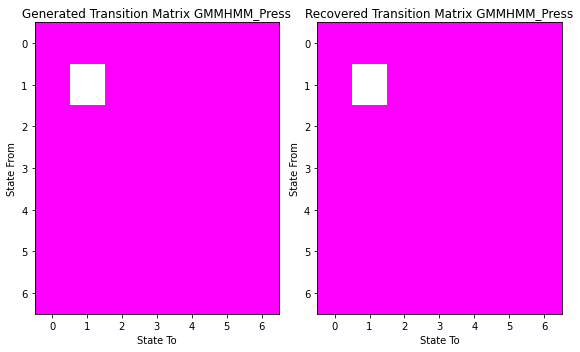

<Figure size 720x576 with 0 Axes>

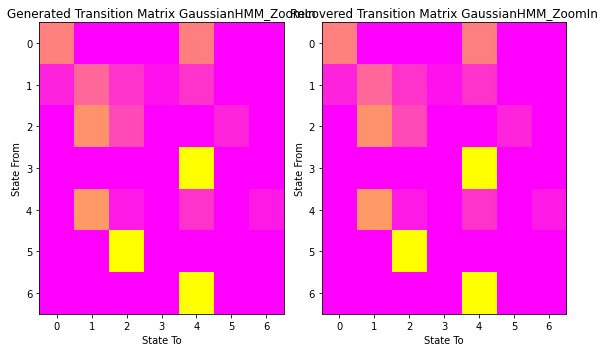

<Figure size 720x576 with 0 Axes>

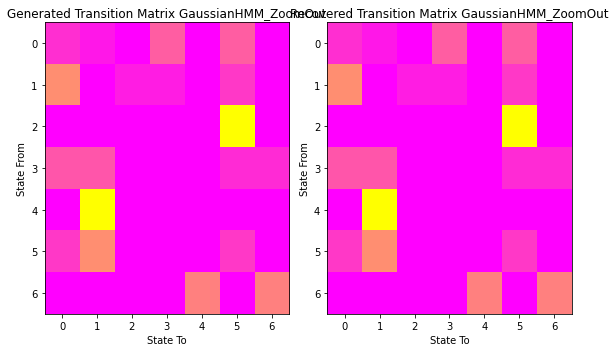

<Figure size 720x576 with 0 Axes>

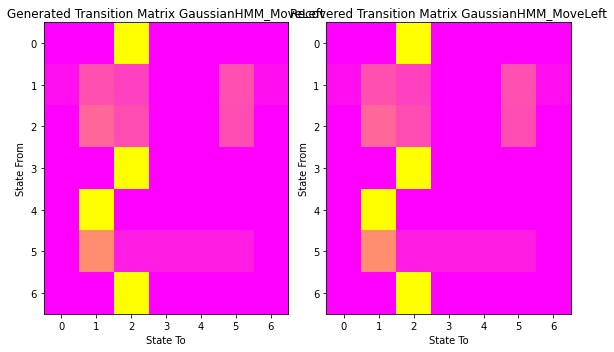

<Figure size 720x576 with 0 Axes>

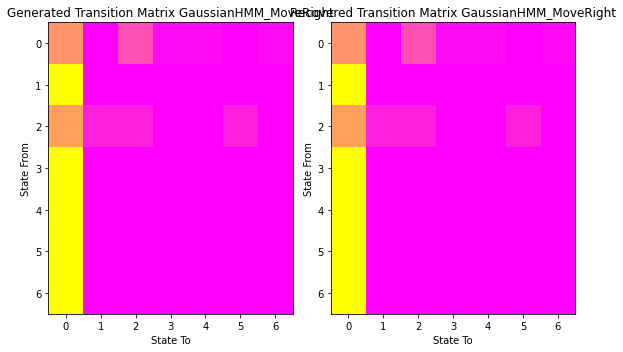

<Figure size 720x576 with 0 Axes>

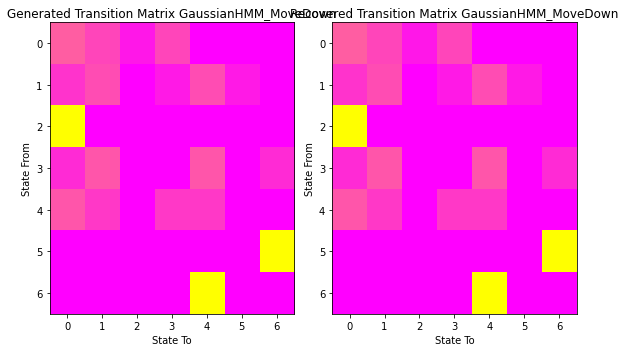

<Figure size 720x576 with 0 Axes>

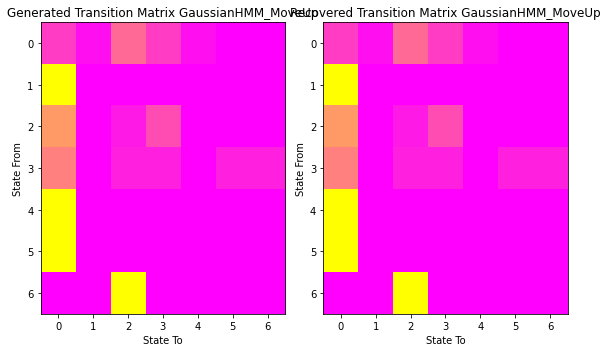

<Figure size 720x576 with 0 Axes>

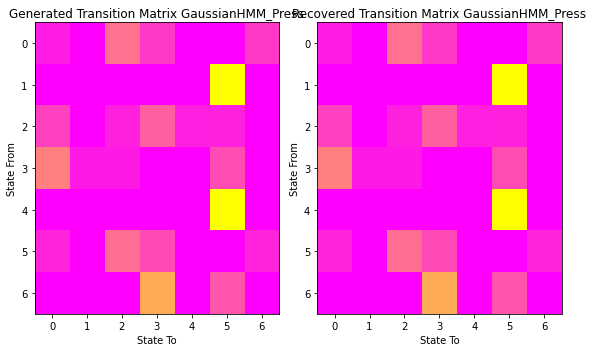

In [14]:
# buidling GaussianHMMfor each seven classes
for model_name in ["GMMHMM","GaussianHMM"]:
    for x in data.Gesture.unique():
        X_data = X_train[np.where(y_train == x)]
        if model_name == "GMMHMM":
            model = hmm.GMMHMM(n_components=7, n_iter=100, init_params="mcs",random_state=0)
            model.fit(X_data)
            with open(f"models/{model_name}_{x}.pkl", "wb") as file: pickle.dump(model, file)
            plot_transition_matrix(model, f"{model_name}_{x}")
        elif model_name == "GaussianHMM":
            model = hmm.GaussianHMM(n_components=7,
                                covariance_type='full',
                                random_state=0, n_iter=100)
            model.fit(X_data)
            with open(f"models/{model_name}_{x}.pkl", "wb") as file: pickle.dump(model, file)
            plot_transition_matrix(model, f"{model_name}_{x}")

# loading and testing the model

In [15]:
# loading and testing the model
for model_name in ["GMMHMM","GaussianHMM"]:
    for x in data.Gesture.unique():
        X_data = X_test[np.where(y_test == x)]
        if model_name == "GMMHMM":
            with open(f"models/{model_name}_{x}.pkl", "rb") as file: model = pickle.load(file)
            model.score(X_data)
        elif model_name == "GaussianHMM":
            with open(f"models/{model_name}_{x}.pkl", "rb") as file: model = pickle.load(file)
            model.score(X_data)

Degenerate mixture covariance
Degenerate mixture covariance


ValueError: transmat_ rows must sum to 1 (got [1. 0. 0. 1. 0. 0. 0.])

In [ ]:
# implementing the forward algorihthm for markov models
def forward_algorithm(model, X_data):
    # Initialize alpha
    alpha = np.zeros((X_data.shape[0], model.n_components))
    # Initialize change
    change = True
    # Iterate until convergence
    while change:
        # Save old alpha
        old_alpha = alpha
        # Update alpha
        for i in range(X_data.shape[0]):
            if i == 0:
                alpha[i] = model.startprob_ * model.predict(X_data[i])
            else:
                alpha[i] = np.dot(alpha[i-1], model.transmat_) * model.predict(X_data[i])
        # Check for convergence
        change = (np.abs(old_alpha - alpha) > 1e-5).any()
    return alpha

In [ ]:
import pickle
with open("models/GMMHMM_MoveUp.pkl", "rb") as file: model = pickle.load(file)

In [ ]:
# implementing the forward algorihthm for markov models
alpha = forward_algorithm(model, X_test)

In [ ]:
# forward algorithm for hmmlearn's gaussianhmm model
with open("models/GaussianHMM_MoveUp.pkl", "rb") as file: model = pickle.load(file)

In [ ]:
alpha = forward_algorithm(model, X_test)